<a href="https://colab.research.google.com/github/PotatoSpudowski/CNN_modelling_using_Pytorch/blob/master/CNN_modeling_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

torch.set_printoptions(linewidth=120)

In [2]:
train = torchvision.datasets.FashionMNIST(
    root = "./data/FashionMNIST",
    train=True,
    download=True,
    transform=transforms.Compose([
                transforms.ToTensor()                  
    ])
)

0it [00:00, ?it/s]

26427392it [00:01, 13717287.38it/s]                             


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 96112.70it/s]                            
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


4423680it [00:01, 4036970.32it/s]                             
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


8192it [00:00, 31067.54it/s]            

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw
Processing...
Done!


In [0]:
train_loader = torch.utils.data.DataLoader(train, batch_size=100)

In [4]:
sample = next(iter(train))

print(len(sample))
print(type(sample))
image, label = sample

2
<class 'tuple'>


In [5]:
print("Image shape: " + str(image.shape))

Image shape: torch.Size([1, 28, 28])


label : 9


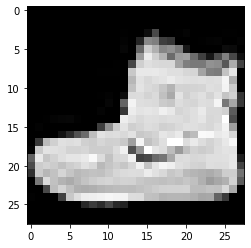

In [6]:
plt.imshow(image.squeeze(), cmap="gray")
print('label :', label)

In [0]:
batch = next(iter(train_loader))
images, labels = batch

In [8]:
images.shape

torch.Size([100, 1, 28, 28])

labels : tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])


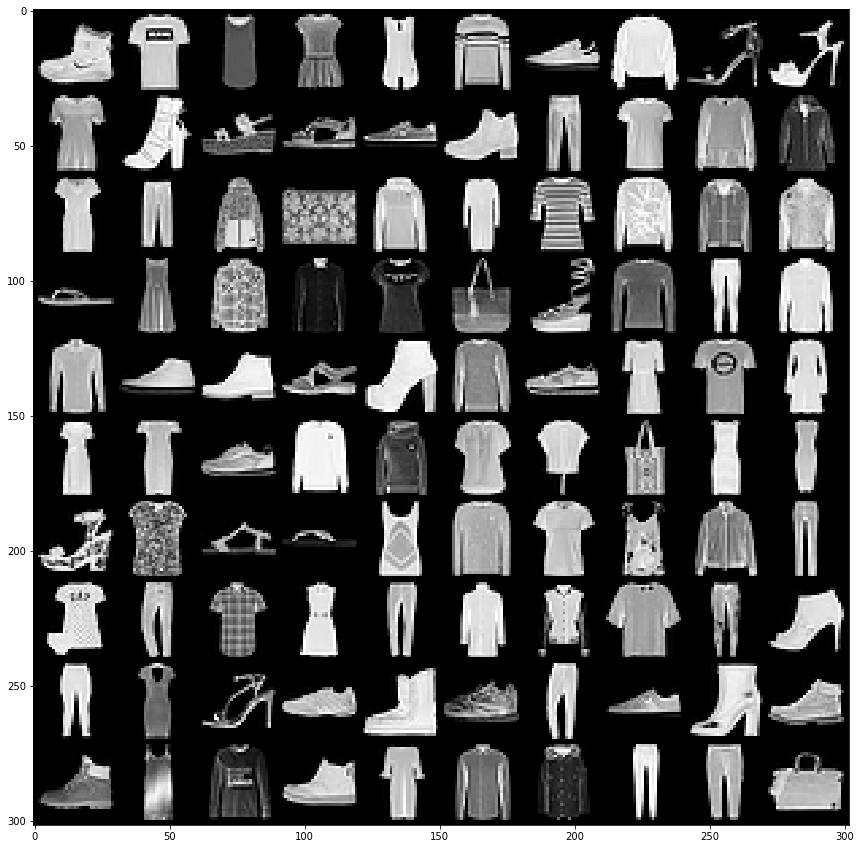

In [9]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels :', labels)

#Model Building

In [0]:
 class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        #input layer
        t = t

        #conv1 layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        #conv2 layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        #fc1 layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        #fc2 layer
        t = self.fc2(t)
        t = F.relu(t)

        #output layer
        t = self.out(t)

        return t


In [35]:
cnn = Network()
cnn

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [36]:
cnn.conv1.weight 
#Contains 6 randomly assigned tensors because out channels is 6

Parameter containing:
tensor([[[[-0.1227,  0.0907, -0.1377,  0.1556, -0.0886],
          [ 0.1120, -0.1488, -0.0018,  0.0199, -0.0957],
          [ 0.1452,  0.1077,  0.1674,  0.0465,  0.0050],
          [ 0.0468, -0.1699, -0.0036,  0.0524, -0.1548],
          [ 0.1338,  0.0017,  0.0346, -0.1483,  0.0223]]],


        [[[ 0.1636,  0.0334, -0.0106, -0.0286, -0.1786],
          [-0.0661,  0.0644,  0.1109, -0.1649, -0.0582],
          [-0.1915, -0.0716, -0.1686, -0.1600,  0.1567],
          [-0.1944,  0.0083, -0.0523,  0.0601, -0.0662],
          [-0.0562,  0.1398, -0.0165,  0.1793, -0.1551]]],


        [[[-0.1111, -0.1475,  0.0017,  0.0405, -0.1402],
          [-0.1122,  0.1957, -0.0807,  0.1777,  0.0903],
          [ 0.1112, -0.1437,  0.1705,  0.1619,  0.0371],
          [-0.0489, -0.0964,  0.0042, -0.1952,  0.0677],
          [-0.1060, -0.1986, -0.1178, -0.0723, -0.0567]]],


        [[[-0.1031, -0.0925, -0.0830, -0.1914,  0.0564],
          [-0.0419,  0.1472,  0.1064,  0.0984,  0.0621

In [37]:
cnn.out.weight

Parameter containing:
tensor([[ 3.5018e-05, -9.2143e-03,  6.9470e-02, -1.6057e-02,  2.3499e-03, -3.1390e-02,  4.4090e-02,  7.0655e-02,
         -1.1830e-02,  1.0734e-01, -7.6941e-02,  3.8423e-02,  4.8719e-02, -1.0382e-01, -1.1883e-01, -8.1315e-03,
          1.8621e-02, -6.4453e-02, -7.6867e-02, -4.9269e-02,  2.5441e-02, -5.7839e-02, -7.1250e-02,  8.2998e-02,
          2.4019e-02, -3.3789e-02,  5.0432e-03,  1.1069e-01, -7.4997e-02,  6.4497e-02,  4.6864e-02,  7.8451e-02,
         -3.7893e-03,  3.1314e-02,  1.1888e-01, -1.4489e-02, -1.0679e-01, -8.0317e-03, -2.2114e-02, -1.1200e-01,
          5.4163e-02, -2.7914e-02,  4.0696e-03,  4.9155e-03,  1.1832e-01,  8.7378e-03,  5.8577e-02, -5.1869e-02,
          2.0645e-02,  1.0849e-01,  9.6209e-02, -1.0658e-01,  2.9950e-02,  2.0880e-02, -9.7483e-02,  5.8054e-02,
          1.8116e-02, -1.1328e-01, -8.4614e-02, -1.1494e-01],
        [-8.6737e-02,  5.4884e-02, -1.2837e-01,  1.0062e-01,  2.6903e-02, -1.5521e-02, -1.2003e-01, -6.0410e-02,
         -3.

In [38]:
print(cnn.conv1.weight.shape)
print(cnn.conv2.weight.shape)
print(cnn.fc1.weight.shape)
print(cnn.fc2.weight.shape)
print(cnn.out.weight.shape)

torch.Size([6, 1, 5, 5])
torch.Size([12, 6, 5, 5])
torch.Size([120, 192])
torch.Size([60, 120])
torch.Size([10, 60])


#Forward Pass

In [29]:
torch.set_grad_enabled(False)

##Passing a single image

In [0]:
image, label = sample

In [40]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [0]:
pred = cnn(image.unsqueeze(0))

In [42]:
pred.shape

torch.Size([1, 10])

In [43]:
pred

tensor([[ 0.0492, -0.0045,  0.0841,  0.0738,  0.0796,  0.1067,  0.0579,  0.0329,  0.1265, -0.1061]])

In [63]:
print("Actual label :", label)
print("Prdicted label :", pred.argmax(dim=1).item())

Actual label : 9
Prdicted label : 8


In [48]:
F.softmax(pred,  dim=1)

tensor([[0.0997, 0.0945, 0.1033, 0.1022, 0.1028, 0.1056, 0.1006, 0.0981, 0.1077, 0.0854]])

##Passing a batch of image

In [0]:
images, labels = batch

In [0]:
preds = cnn(images)

In [52]:
preds

tensor([[ 4.9184e-02, -4.4579e-03,  8.4142e-02,  7.3764e-02,  7.9579e-02,  1.0670e-01,  5.7920e-02,  3.2889e-02,
          1.2648e-01, -1.0613e-01],
        [ 5.0839e-02, -7.5838e-03,  8.7134e-02,  7.5175e-02,  6.9663e-02,  9.6608e-02,  5.0810e-02,  2.8953e-02,
          1.4080e-01, -1.1163e-01],
        [ 5.3424e-02, -5.7494e-03,  8.0829e-02,  7.2734e-02,  8.4298e-02,  1.1330e-01,  5.2013e-02,  3.2006e-02,
          1.2595e-01, -1.0582e-01],
        [ 5.1486e-02, -6.6613e-03,  8.6288e-02,  7.3170e-02,  8.0776e-02,  1.0752e-01,  5.3960e-02,  3.3872e-02,
          1.2904e-01, -1.0579e-01],
        [ 5.6181e-02, -5.4015e-03,  8.8194e-02,  6.9946e-02,  7.4130e-02,  9.8326e-02,  4.7978e-02,  2.9084e-02,
          1.4092e-01, -1.0708e-01],
        [ 4.6017e-02, -3.0714e-03,  8.7538e-02,  6.8665e-02,  7.1661e-02,  9.7776e-02,  5.5068e-02,  3.5411e-02,
          1.3507e-01, -1.0426e-01],
        [ 5.3120e-02, -4.0110e-03,  8.2846e-02,  6.9350e-02,  7.8875e-02,  1.0125e-01,  6.0111e-02,  2.990

In [66]:
print("Actual labels :", labels)
print("Prdicted labels :", preds.argmax(dim=1))

Actual labels : tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])
Prdicted labels : tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])


In [72]:
torch.set_grad_enabled(True)

In [0]:
preds = cnn(images)

In [0]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

##Calculating loss

In [78]:
loss = F.cross_entropy(preds, labels)
loss.item()

2.310126781463623

##Calculating the gradients

In [79]:
print(cnn.conv1.weight.grad)

None


In [0]:
loss.backward() #Backpropogation

In [81]:
print(cnn.conv1.weight.grad)

tensor([[[[-1.4712e-04,  3.7821e-04,  3.6613e-04,  1.8273e-04, -1.4440e-04],
          [ 3.1816e-05,  4.3960e-04,  3.3182e-04,  6.8487e-05, -3.0887e-04],
          [-1.4681e-05,  6.3299e-04,  3.7810e-04,  1.3920e-04, -1.1216e-04],
          [ 1.6696e-04,  5.6197e-04,  6.9984e-04,  6.0001e-04,  2.7203e-04],
          [ 2.9496e-04,  5.8502e-04,  8.0954e-04,  8.7549e-04,  5.4112e-04]]],


        [[[-5.9710e-04, -3.9113e-04, -1.3897e-04, -1.2413e-04, -1.0982e-04],
          [-1.7469e-04, -2.0142e-04, -1.0248e-04, -1.3422e-04, -1.7835e-05],
          [-9.5745e-05, -1.8818e-04, -1.1969e-04, -1.6508e-04,  4.4148e-05],
          [-7.5182e-05, -1.6992e-04, -1.4365e-04, -3.7560e-05,  5.5279e-05],
          [ 1.5637e-04,  2.0811e-05, -1.2278e-04, -2.9838e-04,  2.0530e-04]]],


        [[[ 6.5494e-04,  2.8874e-04, -2.1658e-05, -1.2729e-03, -1.2798e-03],
          [ 7.1895e-04,  4.5123e-04,  1.2162e-04, -7.3348e-04, -1.0423e-03],
          [ 6.1128e-04,  3.6140e-04, -3.4727e-04, -1.1574e-03, -1.46

In [0]:
optimizer = optim.Adam(cnn.parameters(), lr=0.01)

##Before optimizing

In [87]:
print(loss.item())
print(get_num_correct(preds, labels))

2.310126781463623
4


##After Optimizing

In [89]:
optimizer.step()
preds = cnn(images)
loss = F.cross_entropy(preds, labels)
print(loss.item())
print(get_num_correct(preds, labels))

2.272719621658325
15


##Training with a single batch


In [91]:
cnn = Network()

train_loader = torch.utils.data.DataLoader(train, batch_size=100)
optimizer  = optim.Adam(cnn.parameters(), lr=0.01)

batch = next(iter(train_loader))
images, labels = batch

preds = cnn(images)
loss = F.cross_entropy(preds, labels)

loss.backward()
optimizer.step()

print('loss1:', loss.item())
preds = cnn(images)
loss = F.cross_entropy(preds, labels)
print('loss2', loss.item())

loss1: 2.3034026622772217
loss2 2.2653143405914307


##Training a single epoch

In [101]:
cnn = Network()

train_loader = torch.utils.data.DataLoader(train, batch_size=100)
optimizer  = optim.Adam(cnn.parameters(), lr=0.01)

total_loss = []
total_correct = []

for batch in train_loader:
    images, labels = batch

    preds = cnn(images)
    loss = F.cross_entropy(preds, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss.append(loss.item())
    print('loss :', loss.item())
    total_correct.append(get_num_correct(preds, labels))
    print('total_correct :', get_num_correct(preds, labels))


loss : 2.3048408031463623
total_correct : 4
loss : 2.3260598182678223
total_correct : 2
loss : 2.3023064136505127
total_correct : 7
loss : 2.2859554290771484
total_correct : 13
loss : 2.271723985671997
total_correct : 24
loss : 2.2325539588928223
total_correct : 18
loss : 2.1564483642578125
total_correct : 24
loss : 1.9629162549972534
total_correct : 30
loss : 1.8426669836044312
total_correct : 39
loss : 1.7382495403289795
total_correct : 35
loss : 1.9776324033737183
total_correct : 21
loss : 1.5894782543182373
total_correct : 42
loss : 1.5450234413146973
total_correct : 47
loss : 1.5650402307510376
total_correct : 33
loss : 1.5839741230010986
total_correct : 29
loss : 1.4448398351669312
total_correct : 40
loss : 1.3632735013961792
total_correct : 50
loss : 1.226456642150879
total_correct : 59
loss : 1.2884840965270996
total_correct : 58
loss : 1.162366509437561
total_correct : 49
loss : 1.3288121223449707
total_correct : 39
loss : 1.2027608156204224
total_correct : 44
loss : 0.9407044

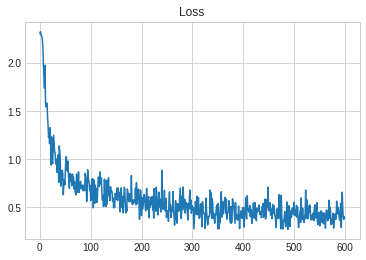

In [102]:
plt.title("Loss")
plt.plot([x for x in range(len(total_loss))], total_loss)

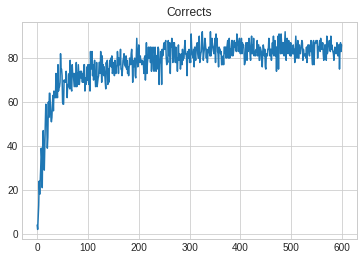

In [103]:
plt.title("Corrects")
plt.plot([x for x in range(len(total_correct))], total_correct)

##Training on multiple epochs

In [105]:
cnn = Network()

train_loader = torch.utils.data.DataLoader(train, batch_size=100)
optimizer  = optim.Adam(cnn.parameters(), lr=0.01)

losses = []
corrects = []
for epoch in range(10):
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images, labels = batch

        preds = cnn(images)
        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        losses.append(loss.item())
        total_correct += get_num_correct(preds, labels)
        corrects.append(get_num_correct(preds, labels))

    print('epoch :', epoch)
    print('Total loss :', total_loss)
    print('Total correct :', total_correct)


epoch : 0
Total loss : 321.7699934989214
Total correct : 47883
epoch : 1
Total loss : 231.13527643680573
Total correct : 51535
epoch : 2
Total loss : 210.44264052808285
Total correct : 52077
epoch : 3
Total loss : 203.31078047305346
Total correct : 52473
epoch : 4
Total loss : 195.9065300822258
Total correct : 52794
epoch : 5
Total loss : 188.2809565588832
Total correct : 53049
epoch : 6
Total loss : 187.64679395407438
Total correct : 53054
epoch : 7
Total loss : 182.38322135806084
Total correct : 53243
epoch : 8
Total loss : 182.01134299486876
Total correct : 53270
epoch : 9
Total loss : 177.85461970418692
Total correct : 53420


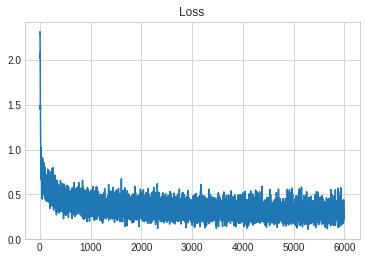

In [106]:
plt.title("Loss")
plt.plot([x for x in range(len(losses))], losses)

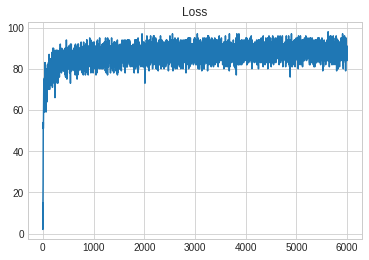

In [107]:
plt.title("Loss")
plt.plot([x for x in range(len(corrects))], corrects)